Visualize winning solutions for Nim

1) Label terminal state (0,0) with 0
2) For each state with all children already labeled, its label is the mex of children's labels (AKA Sprague-Grundy value)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mex(children):
    # gets the next number where the index is not equal to value; [None] is for next value ex. for [1,2,3]=>4
    return next(i for i,v in enumerate(sorted(children)+[None]) if i!=v)

mex([1,2,3,5])
mex([0,2,3,5])

1

In [4]:
# XOR and mex are very closely related!
# verify that a^b is the same as mex([set of x^b for x<a] U [set of y^a for y<b])

a = 40 # ex. 5=0b101
b = 20 # ex. 6=0b110
# ex. a^b = 3 # 0b011

xs = [x^b for x in range(a)]
ys = [y^a for y in range(b)]
# print(xs+ys)

print(f"XOR: {a^b}, mex: {mex(xs+ys)}")
a^b == mex(xs+ys)

XOR: 60, mex: 60


True

Calculate the Sprague-Grundy values for Nim and Wythoff's Nim

- Sprague-Grundy basically "indexes" all of the game states so you know how each state can be changed to another game state (want to make it so that Sprague-Grundy value == 0)
- A Sprague-Grundy value of 0 means you cannot reach another 0-valued position in 1 move. Thus, the other player is forced to make a move which does NOT result in a 0-valued position, in which you can then get to another 0-valued position, since all the positive values are 1 move away. You can keep doing this until you get to the terminal node, or the winning move.

### 2-heap Nim (encodes XOR)

In [5]:
# 2-heap Nim

x = 9; y = 9
arr = np.full((x,y), -1)  # initialize with -1

for row in reversed(range(x)):
    for col in range(y):
        if x-row-1==col:  # if on the diagonal
            arr[row,col] = 0
        else:
            children = set()
            
            r_child = [arr[row][j] for j in range(col)] # row children
            c_child = [arr[x-i-1][col] for i in range(x-row-1)]   # column children
            children.update(r_child + c_child)
            
            arr[row,col] = mex(children)    # Sprague-Grundy value is mex of children, representing game as directed graph
            
print(arr)

[[ 8  9 10 11 12 13 14 15  0]
 [ 7  6  5  4  3  2  1  0 15]
 [ 6  7  4  5  2  3  0  1 14]
 [ 5  4  7  6  1  0  3  2 13]
 [ 4  5  6  7  0  1  2  3 12]
 [ 3  2  1  0  7  6  5  4 11]
 [ 2  3  0  1  6  7  4  5 10]
 [ 1  0  3  2  5  4  7  6  9]
 [ 0  1  2  3  4  5  6  7  8]]


In [17]:
# 2-heap Nim encodes XOR!!

x = 100; y = 100
arr = np.full((x,y), -1)  # initialize with -1

for row in reversed(range(x)):
    for col in range(y):
        arr[x-row-1,col] = row^col
            
print(arr)

[[99 98 97 ...  2  1  0]
 [98 99 96 ...  3  0  1]
 [97 96 99 ...  0  3  2]
 ...
 [ 2  3  0 ... 99 96 97]
 [ 1  0  3 ... 96 99 98]
 [ 0  1  2 ... 97 98 99]]


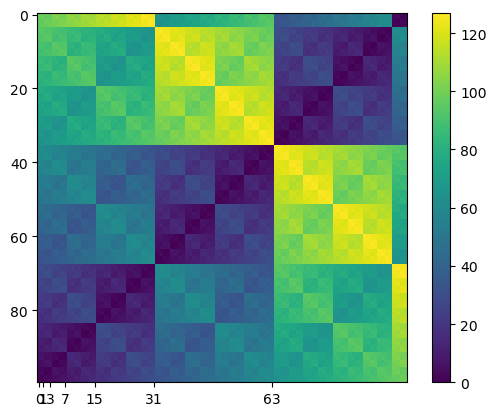

In [27]:
# visualize patterns

plt.xticks([2**i-1 for i in range(10)]) # these are actually the powers of 2 since 0-indexed
plt.imshow(arr)
plt.colorbar()

# WOAH!! Nested games inside nested games...
# Makes sense because each time you double, another 1 is added to binary, which creates another bit to XOR (thus adding another grid-like structure)

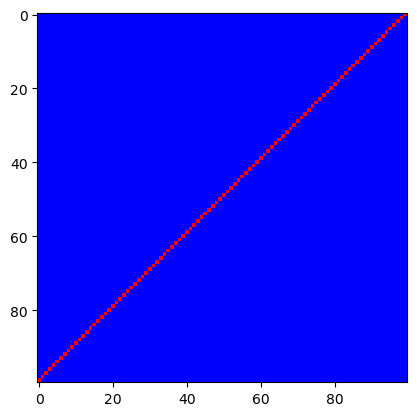

In [9]:
# draw coords with 0's red and everything else blue

arr_plot = np.where(arr==0, 1, 0)
plt.imshow(arr_plot, cmap='bwr')

Amazing how a game of taking stones -> mex for winning states encodes XOR!

Why is the winning move equivalent to XOR?
- One way I think about it is that you always want the piles to have even parity, so that when you create an even parity, the other play is forced to break that parity through making a move, and then you can "mirror" their move to even out the parity again. This way for every one of their move, you can always match their move, so you will always take the last turn and win the game. In other words, abusing symmetry to your own benefit! >:) In the case of 2-heap Nim this makes sense since if you always even out the piles, then by induction you will reach 1:1 where your opponent is forced to take from 1 pile -> 0:1 you take other pile -> 0:0 (this can also be thought of as the last state that you "even out" which happens to be the winnning state).

Why is the winning move equivalent to mex (alternatively, how does XOR "encode" mex)?
- Winning move is equivalent to mex of the children (in this case it is part of the row to the left and part of the col below because of the legal actions in game graph) because it is the positions where another value of 0 is not reachable within one move. (think blue and red coloring above and exclusivity)
- (need to think more about why XOR encodes mex... so far the only heuristic I can think of is that the XOR of a and b is obviously different than changing bits in either a or b, so it is the first value that doesn't appear in the set of smaller_than_a XOR b and a XOR smaller_than_b)

In [10]:
# The evolution graph of the game of Nim with three heaps is the same as three branches of the evolution graph of the Ulam-Warburton automaton.

# build 3D array and find xor, plot

x = 9; y = 9; z = 9
arr = np.full((x,y,z), -1)

for row in reversed(range(x)):
    for col in range(y):
        for depth in range(z):
            arr[x-row-1,col,depth] = row^col^depth
            
print(arr)

[[[ 8  9 10 11 12 13 14 15  0]
  [ 9  8 11 10 13 12 15 14  1]
  [10 11  8  9 14 15 12 13  2]
  [11 10  9  8 15 14 13 12  3]
  [12 13 14 15  8  9 10 11  4]
  [13 12 15 14  9  8 11 10  5]
  [14 15 12 13 10 11  8  9  6]
  [15 14 13 12 11 10  9  8  7]
  [ 0  1  2  3  4  5  6  7  8]]

 [[ 7  6  5  4  3  2  1  0 15]
  [ 6  7  4  5  2  3  0  1 14]
  [ 5  4  7  6  1  0  3  2 13]
  [ 4  5  6  7  0  1  2  3 12]
  [ 3  2  1  0  7  6  5  4 11]
  [ 2  3  0  1  6  7  4  5 10]
  [ 1  0  3  2  5  4  7  6  9]
  [ 0  1  2  3  4  5  6  7  8]
  [15 14 13 12 11 10  9  8  7]]

 [[ 6  7  4  5  2  3  0  1 14]
  [ 7  6  5  4  3  2  1  0 15]
  [ 4  5  6  7  0  1  2  3 12]
  [ 5  4  7  6  1  0  3  2 13]
  [ 2  3  0  1  6  7  4  5 10]
  [ 3  2  1  0  7  6  5  4 11]
  [ 0  1  2  3  4  5  6  7  8]
  [ 1  0  3  2  5  4  7  6  9]
  [14 15 12 13 10 11  8  9  6]]

 [[ 5  4  7  6  1  0  3  2 13]
  [ 4  5  6  7  0  1  2  3 12]
  [ 7  6  5  4  3  2  1  0 15]
  [ 6  7  4  5  2  3  0  1 14]
  [ 1  0  3  2  5  4  7  6  9]
  

/tmp/ipykernel_9524/629748775.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


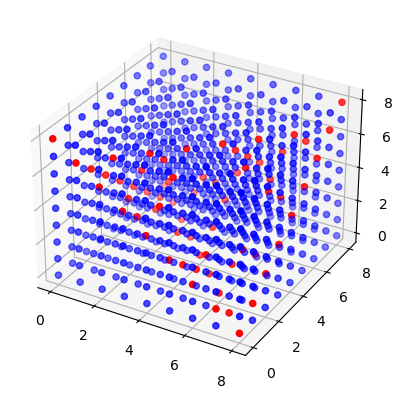

In [11]:
# create 3d plot

arr_plot = np.where(arr==0, 1, 0)
fig = plt.figure()
ax = fig.gca(projection='3d')

xs, ys, zs = np.where(arr_plot==1)
ax.scatter(xs, ys, zs, c='r', marker='o')

xs1, ys1, zs1 = np.where(arr_plot==0)
ax.scatter(xs1, ys1, zs1, c='b', marker='o')

plt.show()

### Wythoff's Nim (encodes Fibonnaci sequences and Golden Ratio!!))

In [37]:
# Wythoff's Nim

x = 100; y = 100
arr = np.full((x,y), -1)  # initialize with -1

for row in reversed(range(x)):
    for col in range(y):
        if row==x-1 and col==0:  # base case
            arr[row,col] = 0
        else:
            children = set()
            
            r_child = [arr[row][j] for j in range(col)] # row children
            c_child = [arr[x-i-1][col] for i in range(x-row-1)]   # column children
            d_child = [arr[x-i-1][j] for i,j in zip(reversed(range(x-row-1)), reversed(range(col)))]  # diagonal children; reverse so that it indexes correctly
            children.update(r_child + c_child + d_child)
            
            arr[row,col] = mex(children)
            
print(arr)

[[ 99 100 101 ...  73 149  77]
 [ 98  96  97 ... 148  75 149]
 [ 97  98  96 ... 138 148  73]
 ...
 [  2   0   1 ...  96  97 101]
 [  1   2   0 ...  98  96 100]
 [  0   1   2 ...  97  98  99]]


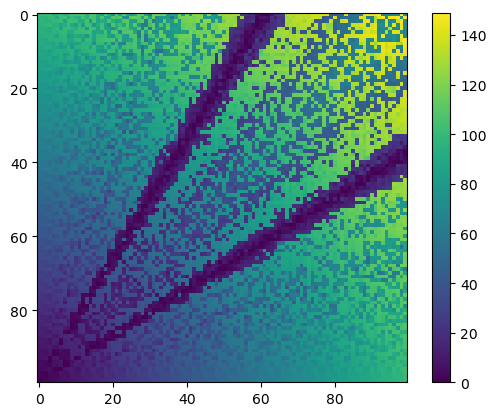

In [38]:
# visualize patterns

plt.imshow(arr)
plt.colorbar()

# SO ELEGANT

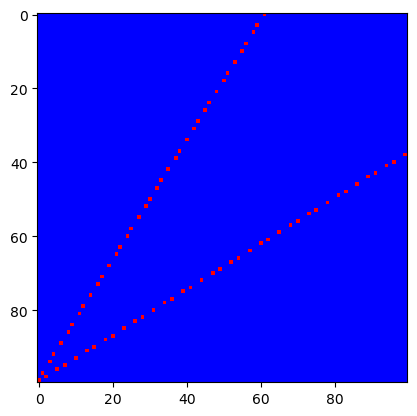

In [40]:
# draw coords with 0's red and everything else blue

arr_plot = np.where(arr==0, 1, 0)
plt.imshow(arr_plot, cmap='bwr')

In [46]:
seq = sorted(zip(x-1-np.where(arr==0)[0], np.where(arr==0)[1]))
# seq = [seq.remove(i) for i in seq if i[0]>i[1]]  # remove permutations
seq[:10]    # fibonacci sequence is hidden within Wythoff's Nim

[(0, 0),
 (1, 2),
 (2, 1),
 (3, 5),
 (4, 7),
 (5, 3),
 (6, 10),
 (7, 4),
 (8, 13),
 (9, 15)]

Beatty's theorem says that, to find the winning solutions to Wythoff's nim, you can take the difference n=y-x and multiply by the golden ratio ~ 1.618 to get x, and add n to get y.

Why does Wythoff's Nim create Beatty's sequence (which includes Fibonnaci seqeunce)?
- Since the valid moves are taking from either pile or equal amounts from same pile, this can be represented as moving left, down, or diagonal from a position. Then the Sprague-Grundy values will only equal 0 when there is no other 0 to the left, down, or diagonal -> no two winning positions can have the same difference n (since they can't be on the same diagonal) or x (can't be on same row) or y (can't be on same column). The mex guarantees that x and y create a partition of all the natural numbers, since x will be the minimal exclusive value, and y is x+n.

1. Verify that two sets A={x1,x2...} and B={y1,y2...} partitions ℕ, where (x_n,y_n) is a winning position to Wythoff's Nim
   - Makes sense because mex guarantees all the natural numbers get covered, and there can't be any duplicates between A and B because the winning positions are where there are no other 0s in that row and col
   - (also in this case we are assuming (x_n,y_m) and (x_m,y_n) are the same)

In [65]:
# set of seq is the same as set of natural numbers
seq_set = set([i[0] for i in seq] + [i[1] for i in seq])
set(range(0, 60)).issubset(seq_set) # only checks up to 60 for now since width of array isn't long enough

True

In [6]:
# Beatty's theorem
# If A and B are irrational numbers that satisfy 1/A + 1/B = 1, then the sequences nA and mB partition the natural numbers.

import math

r = math.pi    # (1+np.sqrt(5))/2
s = r/(r-1)

Br = [math.floor(i*r) for i in range(1,100)]
Bs = [math.floor(i*s) for i in range(1,100)]

print(Br)
print(Bs)

[3, 6, 9, 12, 15, 18, 21, 25, 28, 31, 34, 37, 40, 43, 47, 50, 53, 56, 59, 62, 65, 69, 72, 75, 78, 81, 84, 87, 91, 94, 97, 100, 103, 106, 109, 113, 116, 119, 122, 125, 128, 131, 135, 138, 141, 144, 147, 150, 153, 157, 160, 163, 166, 169, 172, 175, 179, 182, 185, 188, 191, 194, 197, 201, 204, 207, 210, 213, 216, 219, 223, 226, 229, 232, 235, 238, 241, 245, 248, 251, 254, 257, 260, 263, 267, 270, 273, 276, 279, 282, 285, 289, 292, 295, 298, 301, 304, 307, 311]
[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 24, 26, 27, 29, 30, 32, 33, 35, 36, 38, 39, 41, 42, 44, 45, 46, 48, 49, 51, 52, 54, 55, 57, 58, 60, 61, 63, 64, 66, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 90, 92, 93, 95, 96, 98, 99, 101, 102, 104, 105, 107, 108, 110, 111, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127, 129, 130, 132, 133, 134, 136, 137, 139, 140, 142, 143, 145]
